In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Лабораторная работа № 1.2
# **Исследование эффекта Комптона**

С помощью сцинтиляционного спектографа исследуется энергетический спектр $\gamma$\--квантов.
Определяется энергии рассенных $\gamma$\--квантов в зависимости от угла рассеяния, а также энергия покоя частицы, на которой происходит комптоновское рассеяние.



## Теория

Эффект Комптона - увеличение длины рассеянного излучения по сравнению с падающим.
Будем считать, что $\gamma$ -излучение - представляет собой поток квантов у которых:  

$$
    E = \hbar\omega
$$
$$
    p = \dfrac{\hbar\omega}{c}
$$

При этом эффект Комптона интерпретируется как результат упругого соударения двух частиц: $\gamma$\--кванта и свободного электрона. 
Пусть электрон до соударения покоился, его энергия: 

$$ 
    E_{el} = mc^2
$$

$\gamma$ -квант имел начальную энергию 

$$
    E_k = \hbar\omega_0
$$
$$
    p_k = \frac{\hbar\omega}{c}
$$


Тогда после соударения:
$$
    E_{el} = \gamma mc^2
$$
    p_{el} = \gamma mv
$$

Здесь:
* $\gamma = \left(1 - \left(\dfrac{v}{c}\right)^2\right)^\frac{1}{2}$
* $\theta$ - угол, к первоначальному направлению движению, на который рассеялся $\gamma$\--квант 
* $\phi$ - угол, под которым полетел электрон после соударения


Тогда ЗСИ и ЗСЭ:
$$
    mc^2 + \hbar\omega_0 = \gamma mc^2 + \hbar\omega_1
$$
$$
    \dfrac{\hbar\omega_0}{c} = \gamma mv\cos(\phi) + \dfrac{\hbar\omega_1}{c}\cos(\theta) \\
$$
$$
    \gamma mv \sin(\phi) = \dfrac{\hbar\omega}{c}\sin{\theta}
$$


Отсюда:

$$
    \Delta\lambda = \dfrac{h}{mc}(1 - \cos(\theta)) = \Lambda_k(1 - \cos(\theta))
$$
* $\Lambda_k$ - Комптоновская длинна волны электрона.


Последнее равенстно можно переписать в виде:

$$
    \dfrac{1}{\epsilon(\theta)} - \dfrac{1}{\epsilon_0} = 1 - \cos(\theta)
$$
 * $\epsilon_0 = E_0/(mc^2)$ \-- энергия $\gamma$\--кванта, падающего на рассеиватель.

## Измерения
В ходе эксперимента различным уровням энергии будут соответствовать различные каналы $N$, соответствующие вершинам фотопиков.


Таким образом:

$$
    \dfrac{1}{N(\theta)} - \dfrac{1}{N_0} = A(1 - \cos(\theta))
$$

Оценим погрешности:
$$
    \dfrac{\sigma N}{N} = 0.01
$$
$$
    \sigma \theta = 0.5 \deg
$$
$$
    \sigma X = |\sin(\theta)|\sigma\theta \\
$$
$$
    \sigma Y = \left|\dfrac{\sigma N}{N(\theta)^2}\right|
$$

### Результаты измерений

In [2]:
data = pd.read_csv("data_1.2.csv", names=["deg", "N"])

In [3]:
sigma_phi = 0.5 / 90 * np.pi / 2.
sigma_N = 15.

X = (1. - np.cos(data.deg / 90. * np.pi / 2)).values
sigma_X = np.abs(np.sin(data.deg / 90.* np.pi / 2.) * sigma_phi).values
Y = (1. / data.N).values
sigma_Y = np.abs(sigma_N / data.N**2.) .values

data["X"] = X
data["Y"] = Y
data["$\sigma(X)$"] = sigma_X
data["$\sigma(Y)$"] = sigma_Y

In [4]:
data.style \
    .set_table_styles([{'selector': 'th', 'props': [('font-size', '12pt')]}]) \
    .set_properties(**{'font-size':'11pt'}) \
    .format("{:.4f}")

,deg,N,X,Y,$\sigma(X)$,$\sigma(Y)$
0,0.0000,901.0000,0.0000,0.0011,0.0000,0.0000
1,5.0000,945.0000,0.0038,0.0011,0.0008,0.0000
2,10.0000,904.0000,0.0152,0.0011,0.0015,0.0000
3,20.0000,840.0000,0.0603,0.0012,0.0030,0.0000
4,30.0000,797.0000,0.1340,0.0013,0.0044,0.0000
5,40.0000,729.0000,0.2340,0.0014,0.0056,0.0000
6,50.0000,639.0000,0.3572,0.0016,0.0067,0.0000
7,60.0000,562.0000,0.5000,0.0018,0.0076,0.0000
8,70.0000,474.0000,0.6580,0.0021,0.0082,0.0001
9,80.0000,435.0000,0.8264,0.0023,0.0086,0.0001


In [5]:
A = np.vstack([X, np.ones(len(X))]).T
m, c = np.linalg.lstsq(A, Y, rcond=None)[0]

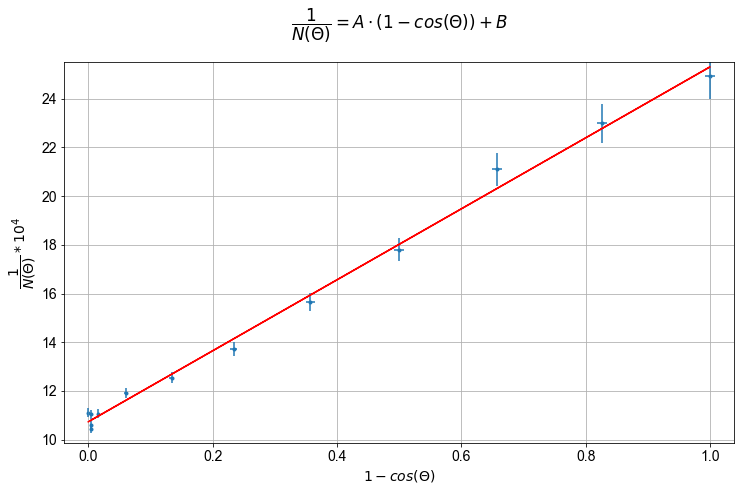

In [14]:
import matplotlib
%matplotlib inline

font = {'family' : 'Arial',
        'size'   : 14}

matplotlib.rc('font', **font)

fig = plt.figure(figsize=(12, 7))
ax = fig.gca()

plt.scatter(X, Y * 10 ** 4, marker=".")
plt.errorbar(X, Y * 10 ** 4, xerr=sigma_X, yerr=sigma_Y * 10 ** 4, linestyle="None")
delta_x = (X.max() - X.min()) / len(X)
delta_y = (Y.max() - Y.min())  * 10 ** 4 / len(Y)

ax.set_xlim(X.min() - delta_x/2, X.max() + delta_x/2)
ax.set_ylim((Y.min() * 10 ** 4 - delta_y/2), Y.max() * 10 ** 4 + delta_y/2)
plt.title("$\dfrac{1}{N(\Theta)} = A\cdot (1-cos(\Theta)) + B$", y=1.07)
plt.xlabel("$1-cos(\Theta)$")
plt.ylabel("$\dfrac{1}{N(\Theta)} * 10^4$")

plt.plot(X, (m*X + c) * 10 ** 4, 'r', label='Fitted line')
plt.grid(True);

## Результаты
Параметры получившейся наилучшей прямой (использованный метод апроксимации \-- OLS (ordinary least square)):
$$
    Y = AX + B
$$
$$
    A = 0.0015 \pm 3 \cdot 10^{-5}
$$
$$
    B = 0.0011 \pm 1 \cdot 10^{-5}
$$

Также, нужно учесть погрещность определения угла и максимума, посколько статистическая погрешность мала по сравнению с упомянутой погрешностью определения максимумов, то оценим:

$$
    \sigma(N_{best}) \leq 9
$$


Отсюда
$$
    N_{best}(0) = 931 \pm 9
$$
$$
    N_{best}(90) = 395 \pm 9
$$
$$
    mc^2 = E_\gamma \cdot \dfrac{N_{best}(90)}{N_{best}(0) - N_{best}(90)} 
$$
$$
    E_\gamma = 661.7 \pm 9\ keV
$$
Получим:
$$
    mc^2 = 487 \pm 35\ keV
$$

## Вывод

Приведённый способ, позволяет определить энергию покоя электрона с хорошей точностью.  
Табличное значение энергии покоя:

$$
    E_t = 508.5\ keV
$$

С учётом погрешности, полученное нами значение энергии покоя электрона совпадает с табличным.